# LOADING THE DATASET

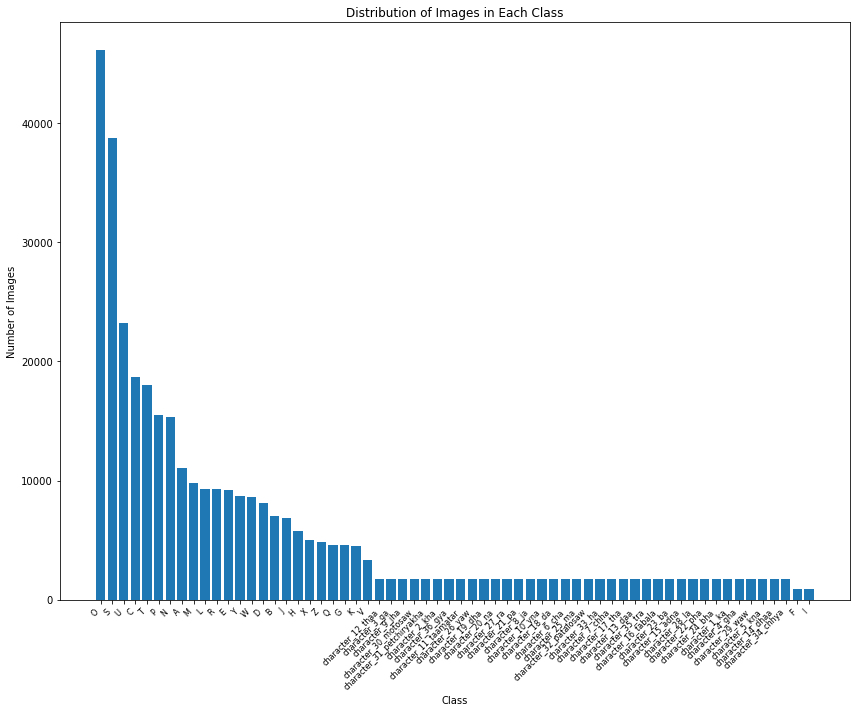

In [10]:
import os
import matplotlib.pyplot as plt

dataset_path = 'english_hindi_combined_dataset/'  # Replace with the actual path to your combined dataset

# Get the list of classes
classes = os.listdir(os.path.join(dataset_path, 'train'))

# Initialize a dictionary to store the count of images for each class
class_counts = {}

# Count the number of images in each class
for class_name in classes:
    class_path = os.path.join(dataset_path, 'train', class_name)
    class_count = len(os.listdir(class_path))
    class_counts[class_name] = class_count

sorted_class_counts = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True))

# Plot the count of images for each class with rotated labels
plt.figure(figsize=(12, 10))
plt.bar(sorted_class_counts.keys(), sorted_class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images in Each Class')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout() 
plt.show()


# Model Training

In [9]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Set the path to your combined dataset
dataset_path = 'english_hindi_combined_dataset/'

# Augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,
)

batch_size = 32

train_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'train/'),
    target_size=(28, 28),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

test_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'test/'),
    target_size=(28, 28),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False
)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(train_generator.class_indices), activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc * 100:.2f}%')

# Save the model
model.save('alphabet_recognition_model.h5')

# Get the class indices mapping
class_indices_mapping = train_generator.class_indices

# Save the mapping to a file (optional)
np.save('class_indices_mapping.npy', class_indices_mapping)


Found 359160 images belonging to 62 classes.
Found 85291 images belonging to 62 classes.
Epoch 1/5


2024-01-20 23:22:57.550777: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


11223/11224 [============================>.] - ETA: 0s - loss: 0.8060 - accuracy: 0.7694

2024-01-20 23:26:01.829713: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


11224/11224 [==============================] - 213s 19ms/step - loss: 0.8060 - accuracy: 0.7694 - val_loss: 0.1450 - val_accuracy: 0.9640
Epoch 2/5
11224/11224 [==============================] - 218s 19ms/step - loss: 0.4162 - accuracy: 0.8740 - val_loss: 0.0958 - val_accuracy: 0.9743
Epoch 3/5
11224/11224 [==============================] - 223s 20ms/step - loss: 0.3352 - accuracy: 0.8990 - val_loss: 0.0853 - val_accuracy: 0.9771
Epoch 4/5
11224/11224 [==============================] - 214s 19ms/step - loss: 0.2887 - accuracy: 0.9128 - val_loss: 0.0757 - val_accuracy: 0.9797
Epoch 5/5
   7/2666 [..............................] - ETA: 47s - loss: 0.0120 - accuracy: 0.9955

2024-01-20 23:41:06.717651: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2666/2666 [==============================] - 41s 15ms/step - loss: 0.0713 - accuracy: 0.9815
Test accuracy: 98.15%


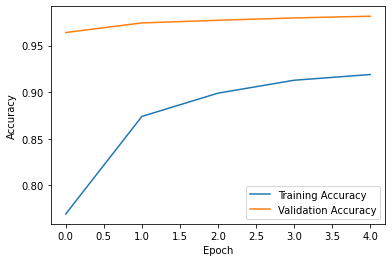

In [10]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
import random


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 70ms/step


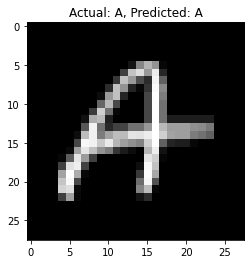

1/1 [==============================] - 0s 24ms/step


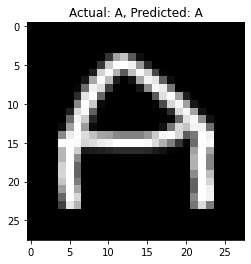

1/1 [==============================] - 0s 25ms/step


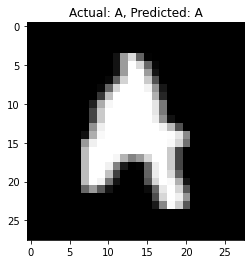

1/1 [==============================] - 0s 24ms/step


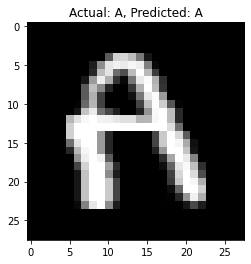

1/1 [==============================] - 0s 23ms/step


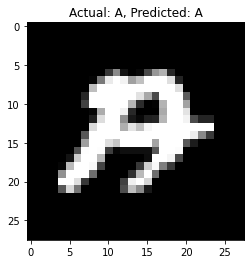

In [18]:
# Making predictions on the testing dataset
# Predictions on the test dataset
test_images, test_labels = next(test_generator)
num_images_to_display = 5

# Get random indices for displaying images
random_indices = random.sample(range(test_images.shape[0]), num_images_to_display)

# Display images along with actual and predicted labels
for idx in random_indices:
    input_image = np.expand_dims(test_images[idx], axis=0)
    actual_label_index = np.argmax(test_labels[idx])
    
    # Perform prediction
    predictions = model.predict(input_image)
    predicted_label_index = np.argmax(predictions)
    
    actual_label = list(train_generator.class_indices.keys())[actual_label_index]
    predicted_label = list(train_generator.class_indices.keys())[predicted_label_index]
    
    
    plt.imshow(test_images[idx].reshape((28, 28)), cmap='gray')
    plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}')
    plt.show()